<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-Python/blob/Master/Pandas_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
pd.get_option("display.max_rows")

60

In [3]:
import numpy as np

df = pd.DataFrame(np.arange(10000).reshape(100, 100))

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,100,101,102,103,104,105,106,107,108,109,...,190,191,192,193,194,195,196,197,198,199
2,200,201,202,203,204,205,206,207,208,209,...,290,291,292,293,294,295,296,297,298,299
3,300,301,302,303,304,305,306,307,308,309,...,390,391,392,393,394,395,396,397,398,399
4,400,401,402,403,404,405,406,407,408,409,...,490,491,492,493,494,495,496,497,498,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9500,9501,9502,9503,9504,9505,9506,9507,9508,9509,...,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599
96,9600,9601,9602,9603,9604,9605,9606,9607,9608,9609,...,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699
97,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,...,9790,9791,9792,9793,9794,9795,9796,9797,9798,9799
98,9800,9801,9802,9803,9804,9805,9806,9807,9808,9809,...,9890,9891,9892,9893,9894,9895,9896,9897,9898,9899


In [5]:
data_json = '{"A": [1, 2, 3, 4] ,"B": [5, 6, 7, 8], "C": [9, 10, 11, 12]}'

In [6]:
dados = pd.read_json(path_or_buf=data_json)
dados

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


In [7]:
dados = pd.read_json(
    path_or_buf=data_json,
    orient='index'
)
dados

,0,1,2,3
A,1,2,3,4
B,5,6,7,8
C,9,10,11,12


In [8]:
dados = pd.read_json(
    path_or_buf=data_json,
    orient='columns'
)
dados

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


In [9]:
dados = pd.read_json(
    path_or_buf='realestates.json',
        orient='columns'
)
dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


In [10]:
bairros = pd.read_excel(
    io = "bairros.xlsx",
        sheet_name="Preço médio por tipo",
        usecols="C:E",
        header = 2,
        index_col=[0, 1],
        names=['bairros','tipo','valor_m2_bairro']
)
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [11]:
teste = pd.read_excel(
    io="bairros.xlsx", 
    sheet_name="Residencial X Comercial", 
    usecols="B:E",
    index_col=[0, 1],
    skiprows=18,
    nrows=17,
    names=['Zonas', 'Bairros', 'Residencial', 'Comercial']
)

teste

Residencial  Comercial
Zonas Bairros                                
Sul   Botafogo               14002       7972
      Catete                 15232       6259
      Copacabana             23318       9355
      Cosme Velho            10320       8177
      Flamengo               19636       7135
      Gávea                  13506       8211
      Humaitá                10603       5039
      Ipanema                15965       7293
      Jardim Botânico        17243       8095
      Lagoa                  24982       6584
      Laranjeiras            17307       7745
      Leblon                 13815       8125
      Leme                   15815       8587
      Rocinha                15110       9023
      São Conrado            20727       9587
      Urca                   22876       6607
      Vidigal                23470       5424

Alternativa correta! Observe que neste exemplo deixamos o parâmetro header com a configuração default (0) e utilizamos os parâmetros skiprows=18 e nrows=17. Lembrando que skiprows informa o “índice” da linha em que o corte será realizado e esta indexação tem início no valor 0, ou seja, skiprows=18 representa que o método read_excel() deve ignorar as dezenove primeiras linhas da planilha. Já nrows=17 informa o número de linhas, a partir do corte, que devem ser consideradas.

In [12]:
dados_highlights_listings = pd.json_normalize(data=dados.highlights, sep='_', record_path=['listings'])
dados_highlights_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"['Sauna', 'Terraço', 'Acessibilidade', 'Mobili...","['Estacionamento Coberto', 'Estacionamento Vis...","['Próximo a Serviços de Saúde', 'Próximo ao Sh...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"['Estacionamento Visitantes', 'Estacionamento ...","['Próximo ao Metrô', 'Próximo a Praia', 'Próxi...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Imóvel Comercial,Ribeira,Point,"[-43.1690005, -22.8239272]",4,180,"['Vista Panorâmica', 'Acessibilidade', 'Área d...","['Segurança Interna', 'Salão de Festas', 'Acad...","['Próximo a Restaurante', 'Próximo a Praia', '...",Padrão,Usado,1050000.0,0.0,0.0,315.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
3,Apartamento,Praça Seca,Point,"[0, 0]",1,50,"['Sauna', 'Quarto/WC Empregada']","['Salão de Jogos', 'Segurança Interna', 'Estac...","['Próximo ao Shopping', 'Próximo a Escola Part...",Padrão,Usado,250000.0,0.0,350.0,150.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
4,Apartamento,Honório Gurgel,Point,"[-43.3614243, -22.8416031]",0,148,"['Terraço', 'Piscina', 'Gás Encanado', 'Acessi...","['Sauna', 'Bicicletário', 'Academia', 'Serviço...","['Próximo a Serviços de Saúde', 'Próximo a Far...",Destaque,Lançamento,165000.0,0.0,270.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
5,Apartamento,Barra da Tijuca,Point,"[-43.3245375, -23.006984]",1,79,"['Terraço', 'Acessibilidade', 'Armários Planej...","['Salão de Festas', 'Estacionamento Visitantes...","['Próximo a Mercado', 'Próximo a Parques e Áre...",Premium,Usado,900000.0,0.0,1400.0,180.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
6,Consultório,Tijuca,Point,"[-43.2558939, -22.9444082]",1,126,"['Armários Planejados', 'Closet', 'Gás Encanad...","['Bicicletário', 'Salão de Jogos', 'Segurança ...","['Próximo a Praia', 'Próximo a Serviços de Saú...",Padrão,Usado,630000.0,0.0,0.0,1500.0,"Amplo imóvel para venda com 2 quartos, sendo 2..."
7,Apartamento,Recreio dos Bandeirantes,Point,"[-43.480981, -23.0160348]",1,126,"['Sauna', 'Cozinha Americana', 'Terraço', 'Gás...","['Estacionamento Visitantes', 'Salão de Festas...","['Próximo a Escola Pública', 'Próximo ao Metrô...",Padrão,Usado,475000.0,0.0,920.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
8,Apartamento,Tijuca,Point,"[-43.2266348, -22.9220052]",0,0,"['Ambientes Integrados', 'Varanda', 'Terraço',...","['Elevador', 'Acessibilidade', 'Estacionamento...",[],Padrão,Usado,0.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
9,Apartamento,Lagoa,Point,"[-43.2112318, -22.9625433]",1,56,"['Sauna', 'Piscina', 'Cozinha Americana', 'Vis...","['Quadra Poliesportiva', 'Bicicletário', 'Pisc...","['Próximo a Farmácia', 'Próximo a Áreas de Laz...",Padrão,Usado,1200000.0,0.0,1608.0,3284.0,"Amplo imóvel para venda com 1 quartos, sendo 1..."


In [13]:
data_json = '{"alunos": [{"Nome": "Rita", "Info": {"Idade": 24, "Medidas": {"Peso": 62, "Altura": 1.65}}}, {"Nome": "Zeca", "Info": {"Idade": 32, "Medidas": {"Peso": 80, "Altura": 1.82}}}]}'

In [14]:
data = pd.read_json(path_or_buf=data_json, orient='columns')
pd.json_normalize(data=data.alunos, sep='_', max_level=1)

data

,alunos
0,"{'Nome': 'Rita', 'Info': {'Idade': 24, 'Medida..."
1,"{'Nome': 'Zeca', 'Info': {'Idade': 32, 'Medida..."


In [15]:
dados_normal_listings = pd.json_normalize(data=dados.normal, sep='_', record_path=['listings'])
dados_normal_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,Point,"[0, 0]",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,Point,"[-43.252201188, -22.9282608539]",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,Point,"[-43.1749613, -22.964604]",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,Point,"[-43.453754, -23.0102127]",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,Point,"[-43.5129166, -23.0241139]",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [16]:
dados_normal_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [17]:
lista_str = dados_normal_listings.loc[0,'imovel_caracteristicas_propriedade']
lista_str

"['Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade']"

In [18]:
lista = lista_str[1:-1].replace("'", "").split(", ")
lista

['Área de Serviço',
 'Terraço',
 'Churrasqueira',
 'Quarto/WC Empregada',
 'Sauna',
 'Varanda',
 'Gás Encanado',
 'Closet',
 'Piscina',
 'Mobiliado',
 'Armários Planejados',
 'Acessibilidade']

In [19]:
Texto = dados_normal_listings.loc[:, 'imovel_caracteristicas_propriedade']
Texto

0     ['Área de Serviço', 'Terraço', 'Churrasqueira'...
1                                             ['Sauna']
2     ['Acessibilidade', 'Área de Serviço', 'Sauna',...
3     ['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...
4                               ['Armários Planejados']
5     ['Mobiliado', 'Varanda', 'Closet', 'Churrasque...
6     ['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...
7     ['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...
8     ['Acessibilidade', 'Mobiliado', 'Churrasqueira...
9     ['Área de Serviço', 'Terraço', 'Ambientes Inte...
10    ['Closet', 'Ambientes Integrados', 'Área de Se...
11                                                   []
12    ['Piscina', 'Quarto/WC Empregada', 'Gás Encana...
13    ['Sauna', 'Terraço', 'Closet', 'Gás Encanado',...
14                                                   []
15    ['Quarto/WC Empregada', 'Varanda', 'Piscina', ...
16    ['Vista Panorâmica', 'Sauna', 'Área de Serviço...
17    ['Quarto/WC Empregada', 'Churrasqueira', '

In [20]:
Texto.str[1:-1].str.replace("'", "").str.split(", ")
Texto

0     ['Área de Serviço', 'Terraço', 'Churrasqueira'...
1                                             ['Sauna']
2     ['Acessibilidade', 'Área de Serviço', 'Sauna',...
3     ['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...
4                               ['Armários Planejados']
5     ['Mobiliado', 'Varanda', 'Closet', 'Churrasque...
6     ['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...
7     ['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...
8     ['Acessibilidade', 'Mobiliado', 'Churrasqueira...
9     ['Área de Serviço', 'Terraço', 'Ambientes Inte...
10    ['Closet', 'Ambientes Integrados', 'Área de Se...
11                                                   []
12    ['Piscina', 'Quarto/WC Empregada', 'Gás Encana...
13    ['Sauna', 'Terraço', 'Closet', 'Gás Encanado',...
14                                                   []
15    ['Quarto/WC Empregada', 'Varanda', 'Piscina', ...
16    ['Vista Panorâmica', 'Sauna', 'Área de Serviço...
17    ['Quarto/WC Empregada', 'Churrasqueira', '

In [21]:
dados_normal_listings.filter(like='imovel_caracteristicas')

,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno
0,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me..."
1,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La..."
2,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular']
3,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '..."
4,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár..."
5,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es..."
6,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P..."
7,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com..."
8,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']"
9,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver..."


In [22]:
columns = dados_normal_listings.filter(like='imovel_caracteristicas')

for column in columns: 
    print(column)

imovel_caracteristicas_propriedade
imovel_caracteristicas_condominio
imovel_caracteristicas_entorno


In [23]:
columns = dados_normal_listings.filter(like='imovel_caracteristicas')

for column in columns: 
    dados_normal_listings[column] = dados_normal_listings[column].str[1:-1].str.replace("'","").str.split(",")

In [24]:
dados_normal_listings.loc[0, 'imovel_caracteristicas_propriedade'][0]

'Área de Serviço'

In [25]:
columns = dados_normal_listings.filter(like='imovel_caracteristicas')

for column in columns: 
    dados_highlights_listings[column] = dados_highlights_listings[column].str[1:-1].str.replace("'","").str.split(",")

In [26]:
dados_highlights_listings.loc[0, 'imovel_caracteristicas_propriedade'][0]

'Sauna'

In [27]:
dados = {
    "alunos": ["Rita", "Lucas", "Zeca", "Ana"], 
    "idade": [10, 12, 11, 10], 
    "medidas_altura": [1.3, 1.5, 1.45, 1.28], 
    "medidas_peso": [42, 50, 45, 38]
}

df = pd.DataFrame(dados)

In [28]:
df.filter(like='medidas', axis='columns')

,medidas_altura,medidas_peso
0,1.30,42
1,1.50,50
2,1.45,45
3,1.28,38


In [29]:
dados_normal_listings.append(dados_highlights_listings)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, ...","[Quadra Poliesportiva, Aceita Pet, Playgroun...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, El...","[Próximo a Centro Empresarial, Próximo a Área...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pis...","[Elevador, Salão de Festas, Porteiro 24 Hora...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
16,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
17,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empr...","[Bicicletário, Sistema de Incêndio, Seguranç...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
18,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Int...","[Playground, Depósito Privativo, Academia, ...","[Próximo a Praia, Próximo a Serviços de Saúde...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [30]:
dados_normal_listings.append(dados_highlights_listings, ignore_index=True)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, ...","[Quadra Poliesportiva, Aceita Pet, Playgroun...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, El...","[Próximo a Centro Empresarial, Próximo a Área...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pis...","[Elevador, Salão de Festas, Porteiro 24 Hora...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empr...","[Bicicletário, Sistema de Incêndio, Seguranç...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Int...","[Playground, Depósito Privativo, Academia, ...","[Próximo a Praia, Próximo a Serviços de Saúde...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [31]:
dados_listings = dados_normal_listings.append(dados_highlights_listings, ignore_index=True) 
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, ...","[Quadra Poliesportiva, Aceita Pet, Playgroun...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, El...","[Próximo a Centro Empresarial, Próximo a Área...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pis...","[Elevador, Salão de Festas, Porteiro 24 Hora...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empr...","[Bicicletário, Sistema de Incêndio, Seguranç...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Int...","[Playground, Depósito Privativo, Academia, ...","[Próximo a Praia, Próximo a Serviços de Saúde...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [32]:
dados_listings = pd.concat([dados_normal_listings,dados_highlights_listings])
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, ...","[Quadra Poliesportiva, Aceita Pet, Playgroun...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, El...","[Próximo a Centro Empresarial, Próximo a Área...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pis...","[Elevador, Salão de Festas, Porteiro 24 Hora...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
16,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
17,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empr...","[Bicicletário, Sistema de Incêndio, Seguranç...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
18,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Int...","[Playground, Depósito Privativo, Academia, ...","[Próximo a Praia, Próximo a Serviços de Saúde...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [33]:
dados_listings = pd.concat([dados_normal_listings,dados_highlights_listings], ignore_index=True)
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, ...","[Quadra Poliesportiva, Aceita Pet, Playgroun...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, El...","[Próximo a Centro Empresarial, Próximo a Área...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pis...","[Elevador, Salão de Festas, Porteiro 24 Hora...","[Próximo a Farmácia, Próximo a Academia, Pró...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empr...","[Bicicletário, Sistema de Incêndio, Seguranç...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Int...","[Playground, Depósito Privativo, Academia, ...","[Próximo a Praia, Próximo a Serviços de Saúde...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [34]:
bairros_amostra = dados_listings['imovel_endereco_bairro']
bairros_amostra

0     Barra da Tijuca
1        Campo Grande
2     Barra da Tijuca
3     Barra da Tijuca
4              Glória
           ...       
65         Copacabana
66             Leblon
67         Copacabana
68           Cachambi
69             Tijuca
Name: imovel_endereco_bairro, Length: 70, dtype: object

In [35]:
bairros_todos = bairros.index.get_level_values('bairros')
bairros_todos

Index(['São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'São Cristóvão',
       'São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'Benfica', 'Benfica',
       'Benfica',
       ...
       'Vila Kosmos', 'Vila Kosmos', 'Vila Kosmos', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre', 'Vista Alegre', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre'],
      dtype='object', name='bairros', length=1127)

In [36]:
bairros_amostra.shape

(70,)

In [37]:
bairros_amostra.nunique()

30

In [38]:
bairros_amostra = pd.Series(bairros_amostra.unique())
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11     Freguesia (Jacarepaguá)
12              Vargem Pequena
13                   Pechincha
14                   Freguesia
15                    Botafogo
16               Vila da Penha
17                 Jacarepaguá
18                 Laranjeiras
19                     Ribeira
20                        Lapa
21                       Rocha
22                    Flamengo
23                Engenho Novo
24               Vargem Grande
25                  Praça Seca
26              Honório Gurgel
27                       Lagoa
28                      Leblon
29                    Cachambi
dtype: object

In [39]:
bairros_todos.shape

(1127,)

In [40]:
bairros_todos = pd.Series(bairros_todos.unique())
bairros_todos

0            São Cristóvão
1                  Benfica
2                     Caju
3                  Catumbi
4                   Centro
              ...         
156    Vicente de Carvalho
157          Vigário Geral
158          Vila da Penha
159            Vila Kosmos
160           Vista Alegre
Name: bairros, Length: 161, dtype: object

In [41]:
bairros.loc["Freguesia"]

,valor_m2_bairro
tipo,
Casa,15156
Apartamento,7930
Cobertura,15391
Consultório,4479
Imóvel Comercial,16730
Loja,7095
Sala Comercial,8666


In [42]:
bairros.loc["Jacarepaguá"]

,valor_m2_bairro
tipo,
Casa,19073
Apartamento,8574
Cobertura,16140
Consultório,7554
Imóvel Comercial,10599
Loja,7305
Sala Comercial,5023


In [43]:
dados_listings['imovel_endereco_bairro'].replace('Freguesia (Jacarepaguá)', 'Freguesia', inplace=True)

In [44]:
bairros_amostra = pd.Series(dados_listings['imovel_endereco_bairro'].unique())
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11                   Freguesia
12              Vargem Pequena
13                   Pechincha
14                    Botafogo
15               Vila da Penha
16                 Jacarepaguá
17                 Laranjeiras
18                     Ribeira
19                        Lapa
20                       Rocha
21                    Flamengo
22                Engenho Novo
23               Vargem Grande
24                  Praça Seca
25              Honório Gurgel
26                       Lagoa
27                      Leblon
28                    Cachambi
dtype: object

In [45]:
bairros_amostra.isin(bairros_todos)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
dtype: bool

In [46]:
dados_listings = pd.merge(
    left = dados_listings,
    right = bairros,
    left_on = ['imovel_endereco_bairro', 'imovel_tipos_propriedade'],
    right_index = True
)
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armári...","[Churrasqueira, Depósito Privativo, Quadra P...","[Próximo a Restaurante, Próximo a Comércio Di...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, ...","[Bicicletário, Comércio/Serviços no Condomíni...","[Próximo a Escola Particular, Próximo a Praia...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço,...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Est...","[Próximo a Restaurante, Próximo a Mercado, P...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqu...","[Acessibilidade, Bicicletário, Aceita Pet, ...","[Próximo ao Metrô, Próximo a Restaurante, Pr...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388


In [47]:
dados_listings['anuncio_descricao'].values[:10]

array(['Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 4 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 5 quartos, sendo 4 suítes, e 5 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 0 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 1 quartos, sendo 0 suítes, e 0 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.'],
      dtype=object)

In [48]:
dados_listings['anuncio_descricao'].str.extractall('(\d+)')

0
   match   
0  0      3
   1      1
   2      2
47 0      4
   1      1
...      ..
66 1      1
   2      2
68 0      3
   1      1
   2      2

[210 rows x 1 columns]

In [49]:
configuracao = dados_listings['anuncio_descricao'].str.extractall('(\d+)')
configuracao.head(9)

0
   match   
0  0      3
   1      1
   2      2
47 0      4
   1      1
   2      2
1  0      2
   1      0
   2      1

In [50]:
configuracao = configuracao.unstack().rename(columns={0: 'quartos', 1: 'suites', 2: 'banheiros'})
configuracao

quartos                 
match quartos suites banheiros
0           3      1         2
1           2      0         1
2           5      4         5
3           2      1         2
4           0      0         1
..        ...    ...       ...
65          4      2         3
66          3      1         2
67          1      0         1
68          3      1         2
69          3      1         2

[70 rows x 3 columns]

In [51]:
configuracao = configuracao.droplevel(level=0, axis=1)
configuracao

match,quartos,suites,banheiros
0,3,1,2
1,2,0,1
2,5,4,5
3,2,1,2
4,0,0,1
...,...,...,...
65,4,2,3
66,3,1,2
67,1,0,1
68,3,1,2


In [52]:
dados_listings = pd.merge(dados_listings, configuracao, left_index=True, right_index=True)
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armári...","[Churrasqueira, Depósito Privativo, Quadra P...","[Próximo a Restaurante, Próximo a Comércio Di...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, ...","[Bicicletário, Comércio/Serviços no Condomíni...","[Próximo a Escola Particular, Próximo a Praia...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço,...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Est...","[Próximo a Restaurante, Próximo a Mercado, P...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqu...","[Acessibilidade, Bicicletário, Aceita Pet, ...","[Próximo ao Metrô, Próximo a Restaurante, Pr...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


In [53]:
tipo_uso = {
    'Apartamento': 'Residencial',
    'Casa': 'Residencial',
    'Cobertura': 'Residencial',
    'Consultório': 'Comercial',
    'Imóvel Comercial': 'Comercial',
    'Loja': 'Comercial',
    'Sala Comercial': 'Comercial'
}

In [54]:
dados_listings.imovel_tipos_propriedade.map(tipo_uso)

0     Residencial
47    Residencial
1     Residencial
16    Residencial
2     Residencial
         ...     
60    Residencial
63    Residencial
64    Residencial
66    Residencial
68      Comercial
Name: imovel_tipos_propriedade, Length: 70, dtype: object

In [55]:
imovel_tipos_uso = dados_listings.imovel_tipos_propriedade.map(tipo_uso)

In [56]:
dados_listings.insert(loc=0, column='imovel_tipos_uso', value=imovel_tipos_uso)

In [57]:
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,...,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",...,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armári...","[Churrasqueira, Depósito Privativo, Quadra P...","[Próximo a Restaurante, Próximo a Comércio Di...",...,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",...,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, ...","[Bicicletário, Comércio/Serviços no Condomíni...","[Próximo a Escola Particular, Próximo a Praia...",...,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],...,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço,...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo...",...,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Est...","[Próximo a Restaurante, Próximo a Mercado, P...",...,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqu...","[Acessibilidade, Bicicletário, Aceita Pet, ...","[Próximo ao Metrô, Próximo a Restaurante, Pr...",...,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",...,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


In [58]:
valor_minimo = dados_listings['anuncio_valores_venda'].min()

In [59]:
valor_maximo = dados_listings['anuncio_valores_venda'].max()

In [60]:
rotulos = ['Popular', 'Padrão', 'Alto Padrão']

In [61]:
pd.cut(x=dados_listings['anuncio_valores_venda'], bins=3, labels=rotulos)

0     Popular
47    Popular
1     Popular
16    Popular
2     Popular
       ...   
60    Popular
63    Popular
64    Popular
66    Popular
68    Popular
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

In [62]:
#É preciso N pontos para obter N - 1 classes
classes = [valor_minimo, 400000, 2000000, valor_maximo]

In [63]:
pd.cut(x=dados_listings['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True)

0     Alto Padrão
47    Alto Padrão
1         Popular
16         Padrão
2     Alto Padrão
         ...     
60        Popular
63        Popular
64        Popular
66    Alto Padrão
68         Padrão
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

In [64]:
dados_listings['classe_valor'] = pd.cut(x=dados_listings['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True)
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,...,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros,classe_valor
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Q...","[Churrasqueira, Salão de Jogos, Sauna, Esta...","[Próximo a Escola Particular, Próximo ao Metr...",...,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2,Alto Padrão
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armári...","[Churrasqueira, Depósito Privativo, Quadra P...","[Próximo a Restaurante, Próximo a Comércio Di...",...,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2,Alto Padrão
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sis...","[Próximo ao Shopping, Próximo a Áreas de Laze...",...,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Popular
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, ...","[Bicicletário, Comércio/Serviços no Condomíni...","[Próximo a Escola Particular, Próximo a Praia...",...,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Padrão
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Am...","[Sauna, Playground, Quadra Poliesportiva, S...",[Próximo a Escola Particular],...,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5,Alto Padrão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço,...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo...",...,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1,Popular
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Est...","[Próximo a Restaurante, Próximo a Mercado, P...",...,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1,Popular
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqu...","[Acessibilidade, Bicicletário, Aceita Pet, ...","[Próximo ao Metrô, Próximo a Restaurante, Pr...",...,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1,Popular
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, ...","[Próximo a Comércio Diversos, Próximo a Centr...",...,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2,Alto Padrão


In [65]:
dados_listings['valor_m2'] = dados_listings['anuncio_valores_venda'] / dados_listings['imovel_area']

In [66]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,inf
24,1600000.0,300,5333.333333


In [67]:
valor_m2 = lambda data: data['anuncio_valores_venda'] / data['imovel_area'] if data['imovel_area'] != 0 else 0

In [68]:
dados_listings['valor_m2'] = dados_listings.apply(valor_m2, axis=1)

In [69]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,0.000000
24,1600000.0,300,5333.333333


In [70]:
dados_listings['Piscina'] = dados_listings['imovel_caracteristicas_condominio'].apply(lambda x: 'PISCINA'.capitalize() in  x)
dados_listings[['imovel_caracteristicas_condominio', 'Piscina']].head()

,imovel_caracteristicas_condominio,Piscina
0,"[Churrasqueira, Salão de Jogos, Sauna, Esta...",False
47,"[Churrasqueira, Depósito Privativo, Quadra P...",False
1,"[Elevador, Playground, Salão de Festas, Sis...",False
16,"[Bicicletário, Comércio/Serviços no Condomíni...",False
2,"[Sauna, Playground, Quadra Poliesportiva, S...",False


In [71]:
pd.set_option('display.max_colwidth', None)

In [72]:
dados_listings[['imovel_caracteristicas_condominio', 'Piscina']]

,imovel_caracteristicas_condominio,Piscina
0,"[Churrasqueira, Salão de Jogos, Sauna, Estacionamento Visitantes, Playground, Salão de Festas, Porteiro 24 Horas, Estacionamento Coberto, Aceita Pet, Sistema de Incêndio, Segurança Interna, Bicicletário, Acessibilidade]",False
47,"[Churrasqueira, Depósito Privativo, Quadra Poliesportiva, Comércio/Serviços no Condomínio, Estacionamento Coberto, Acessibilidade, Segurança Interna, Sauna, Piscina, Elevador, Bicicletário, Salão de Jogos, Sistema de Incêndio, Academia, Estacionamento Visitantes, Playground, Serviço de Transporte no Condomínio, Salão de Festas]",False
1,"[Elevador, Playground, Salão de Festas, Sistema de Incêndio, Salão de Jogos, Depósito Privativo, Porteiro 24 Horas, Academia, Churrasqueira, Quadra Poliesportiva]",False
16,"[Bicicletário, Comércio/Serviços no Condomínio, Salão de Festas, Estacionamento Coberto, Segurança Interna, Quadra Poliesportiva, Churrasqueira, Aceita Pet]",False
2,"[Sauna, Playground, Quadra Poliesportiva, Salão de Festas, Serviço de Transporte no Condomínio, Sistema de Incêndio, Salão de Jogos, Piscina, Aceita Pet]",False
...,...,...
60,[Academia],False
63,"[Playground, Elevador, Salão de Festas, Estacionamento Visitantes, Piscina, Sistema de Incêndio, Churrasqueira, Serviço de Transporte no Condomínio, Porteiro 24 Horas, Quadra Poliesportiva, Academia, Aceita Pet, Depósito Privativo]",False
64,"[Acessibilidade, Bicicletário, Aceita Pet, Churrasqueira, Sistema de Incêndio, Salão de Festas, Porteiro 24 Horas, Quadra Poliesportiva]",False
66,"[Academia, Aceita Pet, Sistema de Incêndio, Bicicletário, Estacionamento Coberto, Churrasqueira, Piscina, Elevador, Estacionamento Visitantes, Salão de Festas, Serviço de Transporte no Condomínio, Sauna, Acessibilidade, Depósito Privativo]",False


In [73]:
dados_listings[['anuncio_valores_venda', 'anuncio_valores_condominio', 'anuncio_valores_iptu']].aggregate(['sum', 'mean', 'std'])

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
sum,1.002803e+08,47515.000000,55128.000000
mean,1.432575e+06,678.785714,787.542857
std,3.025357e+06,817.130130,1521.565886


Pode ser agg também

In [74]:
grupamento = dados_listings[['imovel_tipos_propriedade', 'valor_m2']].groupby(by='imovel_tipos_propriedade')

In [75]:
grupamento.mean().round()

,valor_m2
imovel_tipos_propriedade,
Apartamento,7330.0
Casa,8120.0
Cobertura,7449.0
Consultório,4207.0
Imóvel Comercial,6548.0
Sala Comercial,7028.0


In [77]:
grupamento.agg(func=['min', 'mean', 'max', 'std'])

,valor_m2
min,2.000000
mean,11.666667
max,32.000000
std,12.110601


In [78]:
grupamento = dados_listings[['imovel_tipos_propriedade','classe_valor', 'valor_m2']] \
     .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])

In [79]:
grupamento.mean().round(2)

valor_m2
imovel_tipos_propriedade classe_valor          
Apartamento              Popular        3008.46
                         Padrão         8188.81
                         Alto Padrão   16294.41
Casa                     Popular        3571.30
                         Padrão         9458.75
                         Alto Padrão   11331.15
Cobertura                Popular        3373.24
                         Padrão        15068.49
                         Alto Padrão   11789.47
Consultório              Popular           0.00
                         Padrão         5609.55
                         Alto Padrão        NaN
Imóvel Comercial         Popular            NaN
                         Padrão         5833.33
                         Alto Padrão    7263.16
Sala Comercial           Popular        5562.50
                         Padrão         8492.75
                         Alto Padrão        NaN

In [80]:
grupamento.agg(func=['min', 'mean', 'max', 'std'])

valor_m2                \
                                                min          mean   
imovel_tipos_propriedade classe_valor                               
Apartamento              Popular           0.000000   3008.459035   
                         Padrão            0.000000   8188.808020   
                         Alto Padrão   13241.025641  16294.409159   
Casa                     Popular           0.000000   3571.297397   
                         Padrão         2439.880952   9458.753114   
                         Alto Padrão     103.896104  11331.150536   
Cobertura                Popular           0.000000   3373.235887   
                         Padrão        15068.493151  15068.493151   
                         Alto Padrão   11578.947368  11789.473684   
Consultório              Popular           0.000000      0.000000   
                         Padrão         5000.000000   5609.553479   
                         Alto Padrão            NaN           NaN   
Imóvel Comercial         Popular                NaN           NaN   
                         Padrão         5833.333333   5833.333333   
                         Alto Padrão    7263.157895   7263.157895   
Sala Comercial           Popular        3000.000000   5562.500000   
                         Padrão         4485.507246   8492.753623   
                         Alto Padrão            NaN           NaN   

                                                                  
                                                max          std  
imovel_tipos_propriedade classe_valor                             
Apartamento              Popular        6349.206349  2489.129498  
                         Padrão        21428.571429  5104.396472  
                         Alto Padrão   20642.201835  3866.648881  
Casa                     Popular       14000.000000  5048.330479  
                         Padrão        21666.666667  6859.381332  
                         Alto Padrão   20833.333333  6905.717261  
Cobertura                Popular        5000.000000  2276.818003  
                         Padrão        15068.493151          NaN  
                         Alto Padrão   12000.000000   297.729171  
Consultório              Popular           0.000000          NaN  
                         Padrão         6495.327103   784.999339  
                         Alto Padrão            NaN          NaN  
Imóvel Comercial         Popular                NaN          NaN  
                         Padrão         5833.333333          NaN  
                         Alto Padrão    7263.157895          NaN  
Sala Comercial           Popular        8125.000000  3623.922254  
                         Padrão        12500.000000  5667.102174  
                         Alto Padrão            NaN          NaN

In [81]:
dados_listings.value_counts(subset='imovel_tipos_propriedade')

imovel_tipos_propriedade
Apartamento         32
Casa                21
Cobertura            7
Consultório          4
Sala Comercial       4
Imóvel Comercial     2
dtype: int64

In [82]:
dados_listings.value_counts(subset='imovel_tipos_propriedade', normalize=True)

imovel_tipos_propriedade
Apartamento         0.457143
Casa                0.300000
Cobertura           0.100000
Consultório         0.057143
Sala Comercial      0.057143
Imóvel Comercial    0.028571
dtype: float64

In [83]:
dados_listings.value_counts(subset=['imovel_tipos_uso', 'classe_valor'])

imovel_tipos_uso  classe_valor
Residencial       Padrão          27
                  Popular         21
                  Alto Padrão     12
Comercial         Padrão           6
                  Popular          3
                  Alto Padrão      1
dtype: int64

In [87]:
dados_listings.value_counts(subset=['imovel_tipos_uso', 'classe_valor'],normalize=True).to_frame(name='Percentual')

Percentual
imovel_tipos_uso classe_valor            
Residencial      Padrão          0.385714
                 Popular         0.300000
                 Alto Padrão     0.171429
Comercial        Padrão          0.085714
                 Popular         0.042857
                 Alto Padrão     0.014286

In [88]:
dados_listings.value_counts(subset=['imovel_tipos_uso', 'classe_valor'],normalize=True) \
    .to_frame(name='Percentual') * 100

Percentual
imovel_tipos_uso classe_valor            
Residencial      Padrão         38.571429
                 Popular        30.000000
                 Alto Padrão    17.142857
Comercial        Padrão          8.571429
                 Popular         4.285714
                 Alto Padrão     1.428571

In [89]:
df = pd.DataFrame(
    {
        'alunos': ['Juca', 'Zeca', 'Ana', 'Rita', 'Lia', 'Beto', 'Tina', 'Lucas'],
        'notas': [8, 6.5, 10, 7, 6, 0, 5, 5.5],
        'resultado': ['AP', 'RC', 'AP', 'AP', 'RC', 'RP', 'RP', 'RP']
    }
).set_index('alunos')

In [90]:
df

,notas,resultado
alunos,,
Juca,8.0,AP
Zeca,6.5,RC
Ana,10.0,AP
Rita,7.0,AP
Lia,6.0,RC
Beto,0.0,RP
Tina,5.0,RP
Lucas,5.5,RP


In [91]:
df.agg(['mean', 'std'])
df.groupby(by='resultado').agg(['mean', 'std'])
df.value_counts(subset='resultado', normalize=True).to_frame(name='percentual (%)')*100

,percentual (%)
resultado,
AP,37.5
RP,37.5
RC,25.0


In [92]:
bairros.unstack(level=0)

valor_m2_bairro                                            \
bairros                 Abolição  Acari Alto da Boa Vista Anchieta Andaraí   
tipo                                                                         
Apartamento                 7493   5604              9153     8542    5257   
Casa                       11128  12917             16219    18068   21252   
Cobertura                  10627  13976             18498    10471   14424   
Consultório                 9311   3226              5281     6458    4422   
Imóvel Comercial           17043  11394             16513    11383   15706   
Loja                        4651   5271              4810     9428    3475   
Sala Comercial              4097   7459              9646     6920    8295   

                                                                             \
bairros            Anil Bancários  Bangu Barra da Tijuca Barra de Guaratiba   
tipo                                                                          
Apartamento        5023      8939   5382            6445               8759   
Casa              24106     20556  21099           12835              18640   
Cobertura         19137     19156  17771           12585              10342   
Consultório        7692      6470   9450            5437               8788   
Imóvel Comercial  10859     19012  15719           17116              12288   
Loja               7983      7934   3262            9713               4458   
Sala Comercial     3603      8210   8044            7811               9921   

                  ...                                                     \
bairros           ... Vigário Geral Vila Isabel Vila Kennedy Vila Kosmos   
tipo              ...                                                      
Apartamento       ...          6322        5964         8912        6474   
Casa              ...         22552       18032        12848       22220   
Cobertura         ...         18316       14609        14219       12437   
Consultório       ...          4646        9285         4907        9171   
Imóvel Comercial  ...         12499       12491        18914       19988   
Loja              ...          8919        9151         9461        5393   
Sala Comercial    ...          6466        4122         5221        9463   

                                                                         \
bairros          Vila Militar Vila Valqueire Vila da Penha Vista Alegre   
tipo                                                                      
Apartamento              5234           8147          8966         9981   
Casa                    10126          23512         15369        18505   
Cobertura               15111          14818         17936        16567   
Consultório              7706           5434          3461         5812   
Imóvel Comercial        17324          10002         12830        12895   
Loja                     6442           5209          5384         6182   
Sala Comercial           4258           5524          8495         3377   

                                    
bairros           Zumbi Água Santa  
tipo                                
Apartamento        8427       5575  
Casa              23996      22117  
Cobertura         13176      17590  
Consultório        6714       3732  
Imóvel Comercial  19758      13648  
Loja               7558       3365  
Sala Comercial     5063       4412  

[7 rows x 161 columns]

In [94]:
grupamento = dados_listings[['imovel_tipos_propriedade','classe_valor', 'valor_m2']] \
     .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])

In [95]:
tabela_estatisticas = grupamento.agg(func=['min', 'mean', 'std']).round(2)
tabela_estatisticas

valor_m2                   
                                            min      mean      std
imovel_tipos_propriedade classe_valor                             
Apartamento              Popular           0.00   3008.46  2489.13
                         Padrão            0.00   8188.81  5104.40
                         Alto Padrão   13241.03  16294.41  3866.65
Casa                     Popular           0.00   3571.30  5048.33
                         Padrão         2439.88   9458.75  6859.38
                         Alto Padrão     103.90  11331.15  6905.72
Cobertura                Popular           0.00   3373.24  2276.82
                         Padrão        15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47   297.73
Consultório              Popular           0.00      0.00      NaN
                         Padrão         5000.00   5609.55   785.00
                         Alto Padrão        NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN      NaN
                         Padrão         5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50  3623.92
                         Padrão         4485.51   8492.75  5667.10
                         Alto Padrão        NaN       NaN      NaN

In [96]:
dados = {
    ('Moema', 'Casa'): {
        ('Padrão', 'Venda'): 35, ('Padrão', 'Locação'): 56, 
        ('Alto padrão', 'Venda'): 5, ('Alto padrão', 'Locação'): 12
    }, 
    ('Moema', 'Apartamento'): {
        ('Padrão', 'Venda'): 58, ('Padrão', 'Locação'): 42, 
        ('Alto padrão', 'Venda'): 6, ('Alto padrão', 'Locação'): 5
    }, 
    ('Jardins', 'Casa'): {
        ('Padrão', 'Venda'): 34, ('Padrão', 'Locação'): 48, 
        ('Alto padrão', 'Venda'): 28, ('Alto padrão', 'Locação'): 15
    }, 
    ('Jardins', 'Apartamento'): {
        ('Padrão', 'Venda'): 18, ('Padrão', 'Locação'): 35, 
        ('Alto padrão', 'Venda'): 32, ('Alto padrão', 'Locação'): 25
    }
}

df = pd.DataFrame(dados)

In [97]:
df

Moema             Jardins            
                     Casa Apartamento    Casa Apartamento
Padrão      Venda      35          58      34          18
            Locação    56          42      48          35
Alto padrão Venda       5           6      28          32
            Locação    12           5      15          25

In [98]:
df.unstack().stack(level=0)

Apartamento          Casa      
                        Locação Venda Locação Venda
Alto padrão Jardins          25    32      15    28
            Moema             5     6      12     5
Padrão      Jardins          35    18      48    34
            Moema            42    58      56    35

In [99]:
grupamento = dados_listings[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
    .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])

tabela_estatisticas = grupamento.agg(func=['min', 'mean', 'max', 'std']).round(2)
tabela_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [100]:
tabela_estatisticas = tabela_estatisticas.droplevel(level=0, axis='columns')
tabela_estatisticas

min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [101]:
tabela_estatisticas.reset_index(inplace=True) 
tabela_estatisticas

,imovel_tipos_propriedade,classe_valor,min,mean,max,std
0,Apartamento,Popular,0.00,3008.46,6349.21,2489.13
1,Apartamento,Padrão,0.00,8188.81,21428.57,5104.40
2,Apartamento,Alto Padrão,13241.03,16294.41,20642.20,3866.65
3,Casa,Popular,0.00,3571.30,14000.00,5048.33
4,Casa,Padrão,2439.88,9458.75,21666.67,6859.38
5,Casa,Alto Padrão,103.90,11331.15,20833.33,6905.72
6,Cobertura,Popular,0.00,3373.24,5000.00,2276.82
7,Cobertura,Padrão,15068.49,15068.49,15068.49,NaN
8,Cobertura,Alto Padrão,11578.95,11789.47,12000.00,297.73
9,Consultório,Popular,0.00,0.00,0.00,NaN


In [102]:
tabela_estatisticas.pivot(
    index='imovel_tipos_propriedade',
        columns='classe_valor',
        values='mean'
    )

classe_valor,Popular,Padrão,Alto Padrão
imovel_tipos_propriedade,,,
Apartamento,3008.46,8188.81,16294.41
Casa,3571.30,9458.75,11331.15
Cobertura,3373.24,15068.49,11789.47
Consultório,0.00,5609.55,NaN
Imóvel Comercial,NaN,5833.33,7263.16
Sala Comercial,5562.50,8492.75,NaN


In [103]:
dados_listings.pivot_table(
   values='valor_m2',
     index='imovel_tipos_propriedade',
     columns='classe_valor',

)

classe_valor,Popular,Padrão,Alto Padrão
imovel_tipos_propriedade,,,
Apartamento,3008.459035,8188.808020,16294.409159
Casa,3571.297397,9458.753114,11331.150536
Cobertura,3373.235887,15068.493151,11789.473684
Consultório,0.000000,5609.553479,NaN
Imóvel Comercial,NaN,5833.333333,7263.157895
Sala Comercial,5562.500000,8492.753623,NaN


In [104]:
dados_listings.pivot_table(
   values='valor_m2',
     index='imovel_tipos_propriedade',
     columns='classe_valor',
     fill_value='-',
     margins=True,

)

classe_valor,Popular,Padrão,Alto Padrão,All
imovel_tipos_propriedade,,,,
Apartamento,3008.459035,8188.80802,16294.409159,7329.849069
Casa,3571.297397,9458.753114,11331.150536,8120.400349
Cobertura,3373.235887,15068.493151,11789.473684,7448.626295
Consultório,0.0,5609.553479,-,4207.165109
Imóvel Comercial,-,5833.333333,7263.157895,6548.245614
Sala Comercial,5562.5,8492.753623,-,7027.626812
All,3320.900653,8379.230859,12234.106653,7360.851722


In [105]:
dados_listings.pivot_table(
   values='valor_m2',
     index='imovel_tipos_propriedade',
     columns='classe_valor',
     fill_value='-',
     margins=True,
     margins_name='Média Geral',
     aggfunc='mean'

)

classe_valor,Popular,Padrão,Alto Padrão,Média Geral
imovel_tipos_propriedade,,,,
Apartamento,3008.459035,8188.80802,16294.409159,7329.849069
Casa,3571.297397,9458.753114,11331.150536,8120.400349
Cobertura,3373.235887,15068.493151,11789.473684,7448.626295
Consultório,0.0,5609.553479,-,4207.165109
Imóvel Comercial,-,5833.333333,7263.157895,6548.245614
Sala Comercial,5562.5,8492.753623,-,7027.626812
Média Geral,3320.900653,8379.230859,12234.106653,7360.851722


In [107]:
dados_listings.pivot_table(
   values='valor_m2',
     index=['imovel_tipos_propriedade', 'classe_valor'],
     columns=['anuncio_tipos_listagem','Piscina'],
     fill_value='-',
     margins=True,
     margins_name='Média Geral',
     dropna=False,
     aggfunc='mean'

)

anuncio_tipos_listagem                   Lançamento              Usado  \
Piscina                                       False True         False   
imovel_tipos_propriedade classe_valor                                    
Apartamento              Popular        1114.864865    -   3218.858387   
                         Padrão         3609.871535    -   8733.202854   
                         Alto Padrão   13241.025641    -  17821.100917   
Casa                     Popular         853.658537  0.0   5822.941176   
                         Padrão         3306.896998    -  13560.954817   
                         Alto Padrão    9988.575269    -  11868.180642   
Cobertura                Popular                  -    -   3373.235887   
                         Padrão                   -    -  15068.493151   
                         Alto Padrão        12000.0    -  11578.947368   
Consultório              Popular                  -    -           0.0   
                         Padrão                   -    -   5609.553479   
                         Alto Padrão              -    -             -   
Imóvel Comercial         Popular                  -    -             -   
                         Padrão                   -    -   5833.333333   
                         Alto Padrão              -    -   7263.157895   
Sala Comercial           Popular                  -    -        5562.5   
                         Padrão                   -    -   8492.753623   
                         Alto Padrão              -    -             -   
Média Geral                             5624.899562  0.0   7846.351842   

anuncio_tipos_listagem                               Média Geral  
Piscina                                       True                
imovel_tipos_propriedade classe_valor                             
Apartamento              Popular                 -   3008.459035  
                         Padrão        8636.363636    8188.80802  
                         Alto Padrão             -  16294.409159  
Casa                     Popular                 -   3571.297397  
                         Padrão        5353.658537   9458.753114  
                         Alto Padrão             -  11331.150536  
Cobertura                Popular                 -   3373.235887  
                         Padrão                  -  15068.493151  
                         Alto Padrão             -  11789.473684  
Consultório              Popular                 -           0.0  
                         Padrão                  -   5609.553479  
                         Alto Padrão             -           NaN  
Imóvel Comercial         Popular                 -           NaN  
                         Padrão                  -   5833.333333  
                         Alto Padrão             -   7263.157895  
Sala Comercial           Popular                 -        5562.5  
                         Padrão                  -   8492.753623  
                         Alto Padrão             -           NaN  
Média Geral                            6995.011086   7360.851722

In [110]:
caracteristicas_propriedade = dados_listings['imovel_caracteristicas_propriedade']

In [112]:
caracteristicas_propriedade

0                                                                   [Área de Serviço,  Terraço,  Churrasqueira,  Quarto/WC Empregada,  Sauna,  Varanda,  Gás Encanado,  Closet,  Piscina,  Mobiliado,  Armários Planejados,  Acessibilidade]
47                                                                                                                   [Acessibilidade,  Quarto/WC Empregada,  Armários Planejados,  Área de Serviço,  Ambientes Integrados,  Varanda,  Sauna]
1                                                                                                                                                                                                                                    [Sauna]
16                                                                                                                                            [Vista Panorâmica,  Sauna,  Área de Serviço,  Piscina,  Ambientes Integrados,  Acessibilidade]
2                                                   

In [111]:
caracteristicas_propriedade_itens = caracteristicas_propriedade.explode()
caracteristicas_propriedade_itens

0          Área de Serviço
0                  Terraço
0            Churrasqueira
0      Quarto/WC Empregada
0                    Sauna
              ...         
68                  Closet
68                   Sauna
68       Cozinha Americana
68     Armários Planejados
68                 Terraço
Name: imovel_caracteristicas_propriedade, Length: 526, dtype: object

In [113]:
caracteristicas_propriedade_itens.value_counts()

 Acessibilidade          36
 Closet                  35
 Gás Encanado            34
 Piscina                 32
 Churrasqueira           31
 Terraço                 31
 Ambientes Integrados    31
 Quarto/WC Empregada     30
 Vista Panorâmica        29
 Varanda                 29
 Área de Serviço         28
 Mobiliado               28
 Armários Planejados     28
 Sauna                   28
 Cozinha Americana       26
Sauna                    11
                          8
Cozinha Americana         6
Área de Serviço           6
Acessibilidade            6
Mobiliado                 5
Terraço                   5
Vista Panorâmica          4
Gás Encanado              4
Quarto/WC Empregada       3
Armários Planejados       3
Churrasqueira             2
Closet                    2
Piscina                   2
Ambientes Integrados      2
Varanda                   1
Name: imovel_caracteristicas_propriedade, dtype: int64

In [114]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True),
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,36,0.068441
Closet,35,0.066540
Gás Encanado,34,0.064639
Piscina,32,0.060837
Churrasqueira,31,0.058935
Terraço,31,0.058935
Ambientes Integrados,31,0.058935
Quarto/WC Empregada,30,0.057034
Vista Panorâmica,29,0.055133
Varanda,29,0.055133


In [116]:
caracteristicas_propriedade_itens.where(
    cond=caracteristicas_propriedade_itens!='',
    other='Sem Características',
    inplace=True
)

In [117]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True),
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,36,0.068441
Closet,35,0.066540
Gás Encanado,34,0.064639
Piscina,32,0.060837
Churrasqueira,31,0.058935
Terraço,31,0.058935
Ambientes Integrados,31,0.058935
Quarto/WC Empregada,30,0.057034
Vista Panorâmica,29,0.055133
Varanda,29,0.055133


In [118]:
dados = {
    'acessorios': [
        ['4 X 4', 'Câmera de estacionamento', 'Controle de tração', 'Câmbio automático'],
        ['Câmera de estacionamento', 'Câmbio Automático', 'Rodas de liga', 'Freios ABS'],
        ['Central multimídia', 'Bancos de couro', 'Rodas de liga', 'Câmera de estacionamento'],
        ['Bancos de couro', 'Freios ABS', 'Rodas de liga', 'Câmbio automático'],
        ['Central multimídia', 'ABS', 'Câmbio automático', 'Piloto automático'],
        ['Câmbio automático', 'Controle de tração', 'Piloto automático', 'Central multimídia'],
        ['4 X 4', 'Piloto automático', 'Central multimídia', 'Bancos de couro']        
    ]
}
df = pd.DataFrame(dados)
df

,acessorios
0,"[4 X 4, Câmera de estacionamento, Controle de tração, Câmbio automático]"
1,"[Câmera de estacionamento, Câmbio Automático, Rodas de liga, Freios ABS]"
2,"[Central multimídia, Bancos de couro, Rodas de liga, Câmera de estacionamento]"
3,"[Bancos de couro, Freios ABS, Rodas de liga, Câmbio automático]"
4,"[Central multimídia, ABS, Câmbio automático, Piloto automático]"
5,"[Câmbio automático, Controle de tração, Piloto automático, Central multimídia]"
6,"[4 X 4, Piloto automático, Central multimídia, Bancos de couro]"


In [119]:
acessorios = df['acessorios'].explode().str.upper()
acessorios.where(cond=acessorios!='ABS', other='FREIOS ABS').value_counts()

CÂMBIO AUTOMÁTICO           5
CENTRAL MULTIMÍDIA          4
CÂMERA DE ESTACIONAMENTO    3
RODAS DE LIGA               3
FREIOS ABS                  3
BANCOS DE COURO             3
PILOTO AUTOMÁTICO           3
4 X 4                       2
CONTROLE DE TRAÇÃO          2
Name: acessorios, dtype: int64

In [120]:
tabela_frequencias = pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(sort=False),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True, sort=False),
    left_index=True,
    right_index=True
)
tabela_frequencias

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Área de Serviço,6,0.011407
Terraço,31,0.058935
Churrasqueira,31,0.058935
Quarto/WC Empregada,30,0.057034
Sauna,28,0.053232
Varanda,29,0.055133
Gás Encanado,34,0.064639
Closet,35,0.066540
Piscina,32,0.060837
Mobiliado,28,0.053232


In [121]:
tabela_frequencias.query("index != 'Sem Características'", inplace=True)

In [122]:
tabela_frequencias.rename(columns={
        'imovel_caracteristicas_propriedade_x': 'Frequências',
        'imovel_caracteristicas_propriedade_y': 'Percentual'
}, inplace=True)

tabela_frequencias.rename_axis('características', inplace=True)

tabela_frequencias

,Frequências,Percentual
características,,
Área de Serviço,6,0.011407
Terraço,31,0.058935
Churrasqueira,31,0.058935
Quarto/WC Empregada,30,0.057034
Sauna,28,0.053232
Varanda,29,0.055133
Gás Encanado,34,0.064639
Closet,35,0.066540
Piscina,32,0.060837


In [124]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})

,Frequências,Percentual
características,,
Área de Serviço,6,1.14%
Terraço,31,5.89%
Churrasqueira,31,5.89%
Quarto/WC Empregada,30,5.70%
Sauna,28,5.32%
Varanda,29,5.51%
Gás Encanado,34,6.46%
Closet,35,6.65%
Piscina,32,6.08%


In [126]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color='lightblue')

,Frequências,Percentual
características,,
Área de Serviço,6,1.14%
Terraço,31,5.89%
Churrasqueira,31,5.89%
Quarto/WC Empregada,30,5.70%
Sauna,28,5.32%
Varanda,29,5.51%
Gás Encanado,34,6.46%
Closet,35,6.65%
Piscina,32,6.08%


In [127]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color='lightblue') \
                        .applymap(lambda x: f"color: {'red' if x >= 35 else 'black'}", subset='Frequências')

,Frequências,Percentual
características,,
Área de Serviço,6,1.14%
Terraço,31,5.89%
Churrasqueira,31,5.89%
Quarto/WC Empregada,30,5.70%
Sauna,28,5.32%
Varanda,29,5.51%
Gás Encanado,34,6.46%
Closet,35,6.65%
Piscina,32,6.08%


In [128]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})\
                        .bar(subset='Percentual', vmin = 0.05, color = 'lightblue')\
                        .applymap(lambda x: f"color: {'red' if x >= 35 else 'black'}", subset = 'Frequências')\
                        .applymap(lambda x: f"font-weight: {'bold' if x >= 35 else 'normal'}", subset = 'Frequências')

,Frequências,Percentual
características,,
Área de Serviço,6,1.14%
Terraço,31,5.89%
Churrasqueira,31,5.89%
Quarto/WC Empregada,30,5.70%
Sauna,28,5.32%
Varanda,29,5.51%
Gás Encanado,34,6.46%
Closet,35,6.65%
Piscina,32,6.08%


In [129]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [130]:
bairros.unstack()

valor_m2_bairro                               \
tipo                  Apartamento   Casa Cobertura Consultório   
bairros                                                          
Abolição                     7493  11128     10627        9311   
Acari                        5604  12917     13976        3226   
Alto da Boa Vista            9153  16219     18498        5281   
Anchieta                     8542  18068     10471        6458   
Andaraí                      5257  21252     14424        4422   
...                           ...    ...       ...         ...   
Vila Valqueire               8147  23512     14818        5434   
Vila da Penha                8966  15369     17936        3461   
Vista Alegre                 9981  18505     16567        5812   
Zumbi                        8427  23996     13176        6714   
Água Santa                   5575  22117     17590        3732   

                                                         
tipo              Imóvel Comercial  Loja Sala Comercial  
bairros                                                  
Abolição                     17043  4651           4097  
Acari                        11394  5271           7459  
Alto da Boa Vista            16513  4810           9646  
Anchieta                     11383  9428           6920  
Andaraí                      15706  3475           8295  
...                            ...   ...            ...  
Vila Valqueire               10002  5209           5524  
Vila da Penha                12830  5384           8495  
Vista Alegre                 12895  6182           3377  
Zumbi                        19758  7558           5063  
Água Santa                   13648  3365           4412  

[161 rows x 7 columns]

In [131]:
bairros_zona_sul = ['Ipanema', 'Botafogo', 'Catete', 'Copacabana', 'Lagoa', 'Flamengo', 'Gávea', 'Glória', 'Humaitá',
                    'Jardim Botânico', 'Laranjeiras', 'Leme', 'Urca', 'Vidigal', 'Cosme Velho', 'São Conrado', 'Rocinha',
                    'Leblon']

In [132]:
tabela_zona_sul = bairros.unstack().query("index in " + str(bairros_zona_sul)).droplevel(level=0, axis=1)
tabela_zona_sul

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,7884,24183,14118,6618,16961,4462,9453
Catete,6449,11437,12720,9550,17320,6868,6286
Copacabana,6209,16554,16732,7965,17761,6986,5736
Cosme Velho,6220,23783,14396,6991,18102,6051,7152
Flamengo,9773,11437,11682,3088,14828,7344,6857
Glória,5672,19877,12262,4402,18119,4388,9723
Gávea,7084,12186,16441,5716,17931,5845,6344
Humaitá,6309,19923,15817,6607,18698,8312,9443
Ipanema,7303,10536,17972,6367,10453,9660,5691


In [133]:
tabela_zona_sul.style.format('R$ {:,.2f}')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,"R$ 7,884.00","R$ 24,183.00","R$ 14,118.00","R$ 6,618.00","R$ 16,961.00","R$ 4,462.00","R$ 9,453.00"
Catete,"R$ 6,449.00","R$ 11,437.00","R$ 12,720.00","R$ 9,550.00","R$ 17,320.00","R$ 6,868.00","R$ 6,286.00"
Copacabana,"R$ 6,209.00","R$ 16,554.00","R$ 16,732.00","R$ 7,965.00","R$ 17,761.00","R$ 6,986.00","R$ 5,736.00"
Cosme Velho,"R$ 6,220.00","R$ 23,783.00","R$ 14,396.00","R$ 6,991.00","R$ 18,102.00","R$ 6,051.00","R$ 7,152.00"
Flamengo,"R$ 9,773.00","R$ 11,437.00","R$ 11,682.00","R$ 3,088.00","R$ 14,828.00","R$ 7,344.00","R$ 6,857.00"
Glória,"R$ 5,672.00","R$ 19,877.00","R$ 12,262.00","R$ 4,402.00","R$ 18,119.00","R$ 4,388.00","R$ 9,723.00"
Gávea,"R$ 7,084.00","R$ 12,186.00","R$ 16,441.00","R$ 5,716.00","R$ 17,931.00","R$ 5,845.00","R$ 6,344.00"
Humaitá,"R$ 6,309.00","R$ 19,923.00","R$ 15,817.00","R$ 6,607.00","R$ 18,698.00","R$ 8,312.00","R$ 9,443.00"
Ipanema,"R$ 7,303.00","R$ 10,536.00","R$ 17,972.00","R$ 6,367.00","R$ 10,453.00","R$ 9,660.00","R$ 5,691.00"


In [135]:
tabela_zona_sul.style.format('R$ {:,.2f}') \
                     .highlight_max(color='lightgreen') \
                     .highlight_min(color='#C26161')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,"R$ 7,884.00","R$ 24,183.00","R$ 14,118.00","R$ 6,618.00","R$ 16,961.00","R$ 4,462.00","R$ 9,453.00"
Catete,"R$ 6,449.00","R$ 11,437.00","R$ 12,720.00","R$ 9,550.00","R$ 17,320.00","R$ 6,868.00","R$ 6,286.00"
Copacabana,"R$ 6,209.00","R$ 16,554.00","R$ 16,732.00","R$ 7,965.00","R$ 17,761.00","R$ 6,986.00","R$ 5,736.00"
Cosme Velho,"R$ 6,220.00","R$ 23,783.00","R$ 14,396.00","R$ 6,991.00","R$ 18,102.00","R$ 6,051.00","R$ 7,152.00"
Flamengo,"R$ 9,773.00","R$ 11,437.00","R$ 11,682.00","R$ 3,088.00","R$ 14,828.00","R$ 7,344.00","R$ 6,857.00"
Glória,"R$ 5,672.00","R$ 19,877.00","R$ 12,262.00","R$ 4,402.00","R$ 18,119.00","R$ 4,388.00","R$ 9,723.00"
Gávea,"R$ 7,084.00","R$ 12,186.00","R$ 16,441.00","R$ 5,716.00","R$ 17,931.00","R$ 5,845.00","R$ 6,344.00"
Humaitá,"R$ 6,309.00","R$ 19,923.00","R$ 15,817.00","R$ 6,607.00","R$ 18,698.00","R$ 8,312.00","R$ 9,443.00"
Ipanema,"R$ 7,303.00","R$ 10,536.00","R$ 17,972.00","R$ 6,367.00","R$ 10,453.00","R$ 9,660.00","R$ 5,691.00"


In [138]:
tabela_zona_sul[['Apartamento']].style \
                               .format('R$ {:,.2f}') \
                               .background_gradient(cmap='Reds')

tipo,Apartamento
bairros,
Botafogo,"R$ 7,884.00"
Catete,"R$ 6,449.00"
Copacabana,"R$ 6,209.00"
Cosme Velho,"R$ 6,220.00"
Flamengo,"R$ 9,773.00"
Glória,"R$ 5,672.00"
Gávea,"R$ 7,084.00"
Humaitá,"R$ 6,309.00"
Ipanema,"R$ 7,303.00"


In [139]:
tabela_zona_sul.style \
               .format('R$ {:,.2f}') \
               .background_gradient(subset=['Apartamento'], cmap='Greens') \
               .background_gradient(subset=['Cobertura'], cmap='Blues')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,"R$ 7,884.00","R$ 24,183.00","R$ 14,118.00","R$ 6,618.00","R$ 16,961.00","R$ 4,462.00","R$ 9,453.00"
Catete,"R$ 6,449.00","R$ 11,437.00","R$ 12,720.00","R$ 9,550.00","R$ 17,320.00","R$ 6,868.00","R$ 6,286.00"
Copacabana,"R$ 6,209.00","R$ 16,554.00","R$ 16,732.00","R$ 7,965.00","R$ 17,761.00","R$ 6,986.00","R$ 5,736.00"
Cosme Velho,"R$ 6,220.00","R$ 23,783.00","R$ 14,396.00","R$ 6,991.00","R$ 18,102.00","R$ 6,051.00","R$ 7,152.00"
Flamengo,"R$ 9,773.00","R$ 11,437.00","R$ 11,682.00","R$ 3,088.00","R$ 14,828.00","R$ 7,344.00","R$ 6,857.00"
Glória,"R$ 5,672.00","R$ 19,877.00","R$ 12,262.00","R$ 4,402.00","R$ 18,119.00","R$ 4,388.00","R$ 9,723.00"
Gávea,"R$ 7,084.00","R$ 12,186.00","R$ 16,441.00","R$ 5,716.00","R$ 17,931.00","R$ 5,845.00","R$ 6,344.00"
Humaitá,"R$ 6,309.00","R$ 19,923.00","R$ 15,817.00","R$ 6,607.00","R$ 18,698.00","R$ 8,312.00","R$ 9,443.00"
Ipanema,"R$ 7,303.00","R$ 10,536.00","R$ 17,972.00","R$ 6,367.00","R$ 10,453.00","R$ 9,660.00","R$ 5,691.00"


In [140]:
tabela_zona_sul.style \
               .format('R$ {:,.2f}') \
               .background_gradient(subset=['Apartamento'], cmap='Greens') \
               .background_gradient(subset=['Cobertura'], cmap='Blues') \
               .to_excel('Tabela Zona Sul.xlsx', engine='openpyxl')

In [141]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [142]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral',
            'gist_ncar']

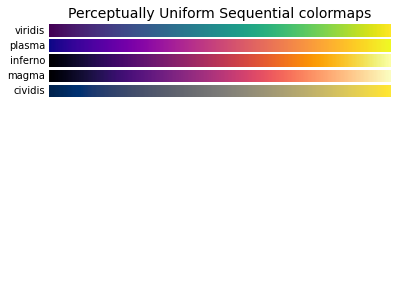

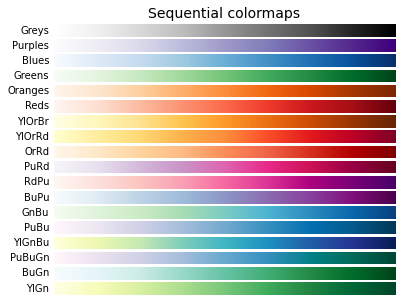

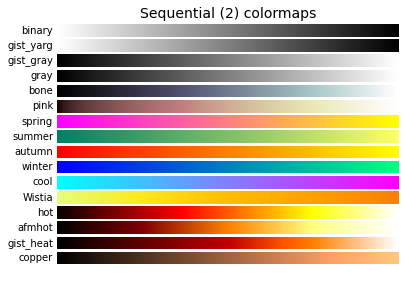

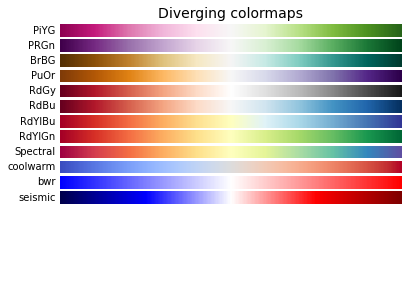

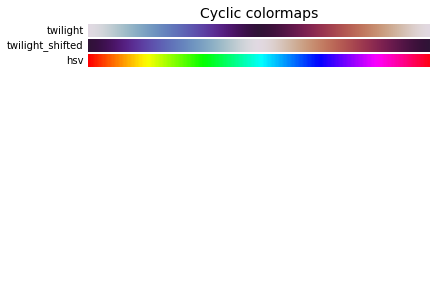

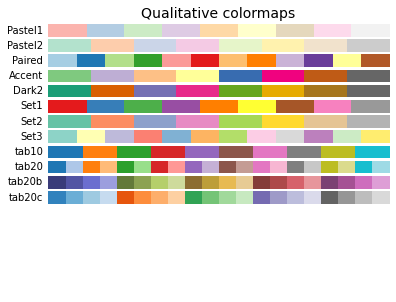

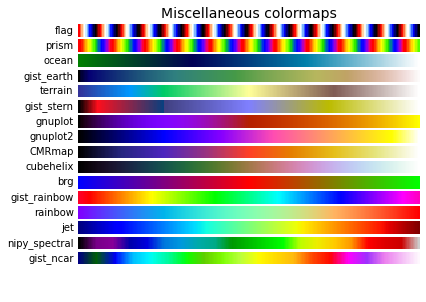

In [143]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()